#  Project A: Processing of a Sales Forecasting Model
## Group-02

**Accurately forecasting sales is a major challenge for retailers, influenced by factors like promotions, competition, holidays, seasonality, and locality. This project aims to predict six weeks of daily sales for 1,115 drug stores in Germany. Reliable forecasts can enhance store productivity, profitability, and customer satisfaction. The key challenges include accounting for various factors and dealing with missing historical data. Therefore, the historical dataset must be fully pre-processed to ensure reliable forecasts, involving tasks like data integration, visualization, cleaning, and transformation**el

## Importing Libraries

***Important Linraries for Data cleaning, reviewing, analysis and forecasting are imported and different packages ares installed***.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
!pip install xgboost
import xgboost as xgb
import time
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.ticker import FuncFormatter


## Loading Data Sets


***We have three datasets:***

**1-Store.csv**

**2-train.csv**

**3-test.csv**

All three datasets were loaded, and subsequently, the Store and Train datasets were merged using the common parameter 'store' to create a unified dataset named 'working file'. Data types within the dataset were then examined, and necessary modifications were made to ensure their suitability for further processing.

In [51]:
store = pd.read_csv("D:\SRM\Python Programming\MGT001437_ProjectA\store.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\2806588840.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [63]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [65]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1
1017205,1112,2,01/01/2013,0,0,0,0,a,1
1017206,1113,2,01/01/2013,0,0,0,0,a,1
1017207,1114,2,01/01/2013,0,0,0,0,a,1


### Merging Files
**Files are merged to create a unified data set for further processing**

In [66]:
working_file=pd.merge(train, store, on='Store')
working_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Changing Datatype

In [127]:
working_file['Date'] = pd.to_datetime(working_file['Date'], format='%d/%m/%Y', dayfirst=True) #Data type of Date is converted from object to Datetime
working_file['Year'] = working_file['Date'].dt.year # a new column year is added to indicate year
working_file['Month'] =pd.to_datetime(working_file['Date']).dt.strftime('%B') # a new column month is added to indicate month
working_file['Day'] =pd.to_datetime(working_file['Date']).dt.strftime('%A') # a new column Day is added to indicate name of the Day


In [128]:
# Rearranging columns for better visualisation
working_file = working_file[['Store', 'DayOfWeek', 'Date', 'Day', 'Month', 'Year', 'Sales', 'Customers', 'Open', 'Promo', 
         'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 
         'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 
         'Promo2SinceYear', 'PromoInterval']]
working_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Day                        1017209 non-null  object        
 4   Month                      1017209 non-null  object        
 5   Year                       1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday              1017209 no

## Preprocessing of Data

***Working file was divided into two parts:***

***1. Store_Open_data***

***2. Store_Close_data***

This was done for data exploration and initial Analysis. In order to have yearwise overview of data and visualisation further subdatasets were created naming:

1-Year_2013

2-Year_2014

3-Year_2015

In [123]:
Store_open_data= working_file[working_file["Open"]>=1]

In [85]:
Store_closed_data= working_file[working_file["Open"]==0]

In [132]:
Year_2013 = Store_open_data[Store_open_data['Year'] == 2013]
Year_2014 = Store_open_data[Store_open_data['Year'] == 2014]
Year_2015 = Store_open_data[Store_open_data['Year'] == 2015]

In [143]:
# Separate data into promotional and non-promotional periods
promotional_sales = Store_open_data[Store_open_data['Promo'] == 1]['Sales']
non_promotional_sales = Store_open_data[Store_open_data['Promo'] == 0]['Sales']

# Calculate average sales for each group
average_promo_sales = promotional_sales.mean()
average_non_promo_sales = non_promotional_sales.mean()

# Compare average sales
sales_impact = average_promo_sales - average_non_promo_sales

# Print the results
print("Average sales during promotional periods:", average_promo_sales)
print("Average sales during non-promotional periods:", average_non_promo_sales)
print("Impact of promotion on sales:", sales_impact)


Average sales during promotional periods: 8228.281239386994
Average sales during non-promotional periods: 5929.407603487516
Impact of promotion on sales: 2298.8736358994774


## Introduction and Data Overview

In [82]:
working_file.describe()

,Store,DayOfWeek,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,2.013832e+03,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,7.773960e-01,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,2.013000e+03,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,2.014000e+03,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,2.014000e+03,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,2.015000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [83]:
Store_open_data.describe()

,Store,DayOfWeek,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000
mean,558.422920,3.520361,2013.831937,6955.514291,762.728395,1.0,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019
std,321.731914,1.723689,0.777260,3104.214680,401.227674,0.0,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962
min,1.000000,1.000000,2013.000000,0.000000,0.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,280.000000,2.000000,2013.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.000000,3.000000,2014.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000
75%,837.000000,5.000000,2014.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,2015.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [86]:
Store_closed_data.describe()

,Store,DayOfWeek,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,172817.000000,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000,172361.000000,118088.000000,118088.000000,172817.000000,88093.000000,88093.000000
mean,558.462987,6.333769,2013.834027,0.0,0.0,0.0,0.064716,0.105684,5293.787574,7.213053,2008.653563,0.509747,23.343977,2011.746824
std,322.771734,1.547688,0.778058,0.0,0.0,0.0,0.246025,0.307434,7236.355140,3.220047,6.063202,0.499906,14.073822,1.671959
min,1.000000,1.000000,2013.000000,0.0,0.0,0.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.000000,7.000000,2013.000000,0.0,0.0,0.0,0.000000,0.000000,700.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,560.000000,7.000000,2014.000000,0.0,0.0,0.0,0.000000,0.000000,2370.000000,7.000000,2009.000000,1.000000,22.000000,2012.000000
75%,839.000000,7.000000,2014.000000,0.0,0.0,0.0,0.000000,0.000000,6870.000000,10.000000,2012.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,2015.000000,0.0,0.0,0.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploratory Data Analysis

### Total Sales

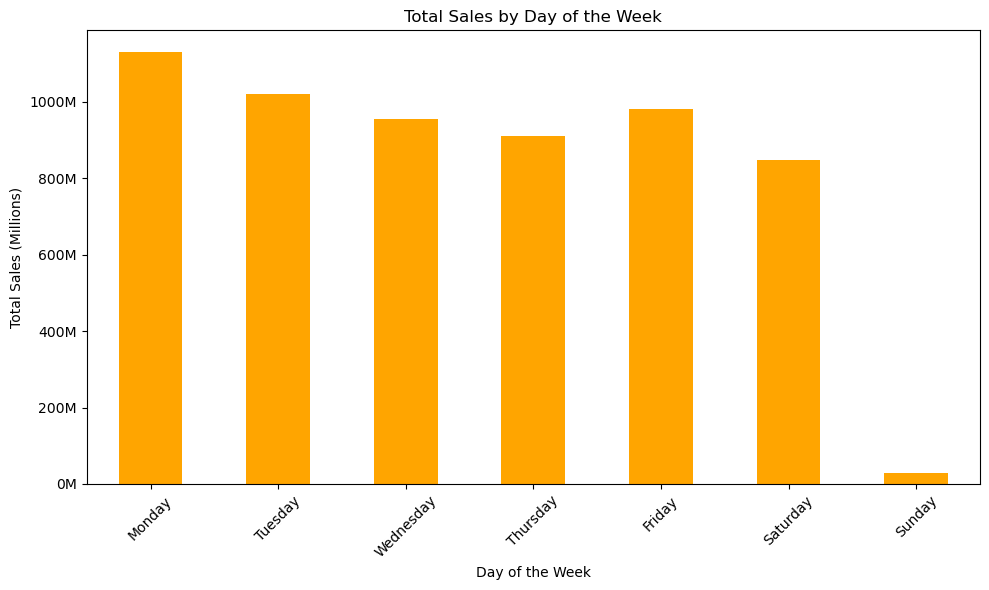

In [103]:
daily_sales = working_file.groupby('Day')['Sales'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex daily_sales to match the specified order
daily_sales = daily_sales.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = daily_sales.plot(kind='bar', color='orange')

# Format y-axis labels to display values in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

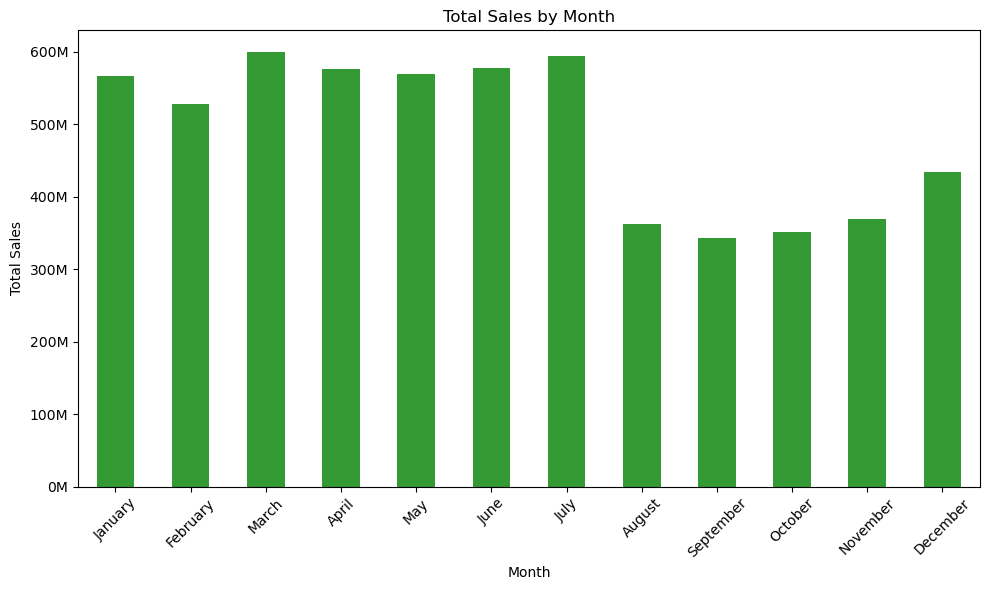

In [102]:
month_sales = working_file.groupby('Month')['Sales'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_sales = month_sales.reindex(months_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales.plot(kind='bar', color='green', alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\1022112942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Month'] = pd.Categorical(Store_open_data['Month'], categories=months_order, ordered=True)


<Figure size 1400x800 with 0 Axes>

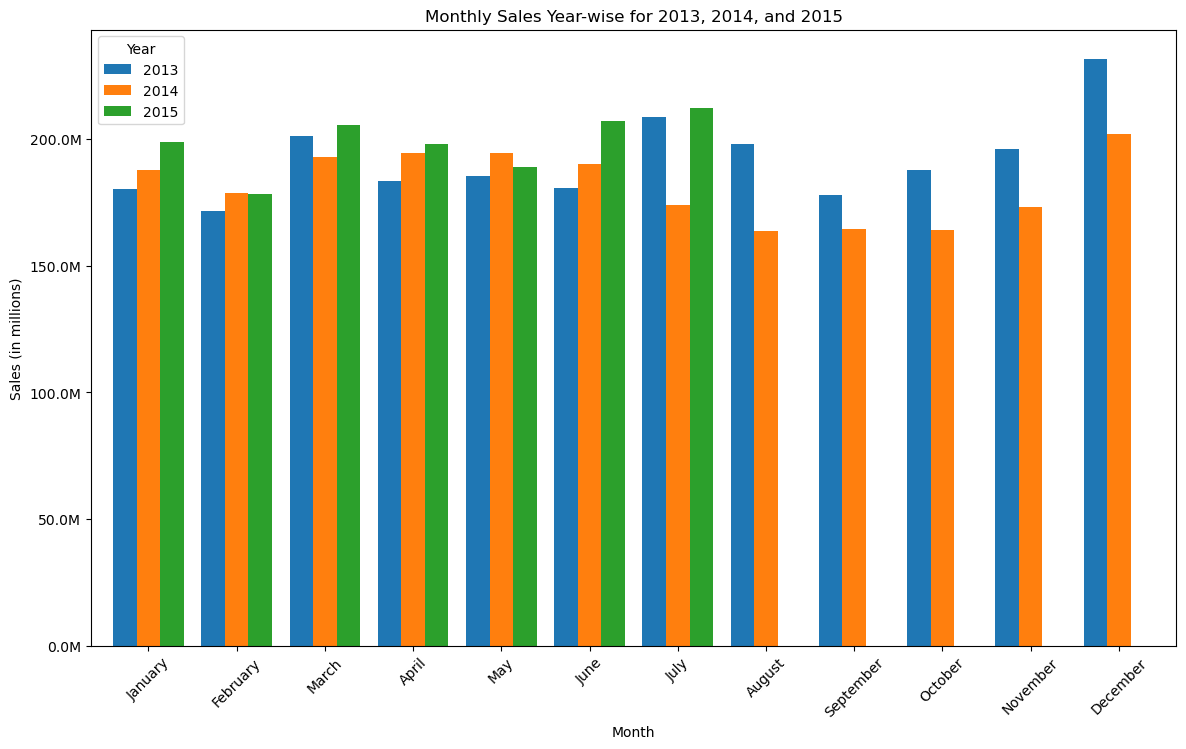

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical type with the specified order
Store_open_data['Month'] = pd.Categorical(Store_open_data['Month'], categories=months_order, ordered=True)

# Filter data for the years 2013, 2014, and 2015
Store_open_data_filtered = Store_open_data[Store_open_data['Year'].isin([2013, 2014, 2015])]

# Group by Year and Month and sum the Sales
monthly_sales_yearwise = Store_open_data_filtered.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_plot = monthly_sales_yearwise.plot(kind='bar', width=0.8, figsize=(14, 8))

# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45)

# Format the y-axis labels to show sales in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Monthly Sales Year-wise for 2013, 2014, and 2015')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')
plt.legend(title='Year')
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\1028979480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Month'] = pd.Categorical(Store_open_data['Month'], categories=months_order, ordered=True)


<Figure size 1400x800 with 0 Axes>

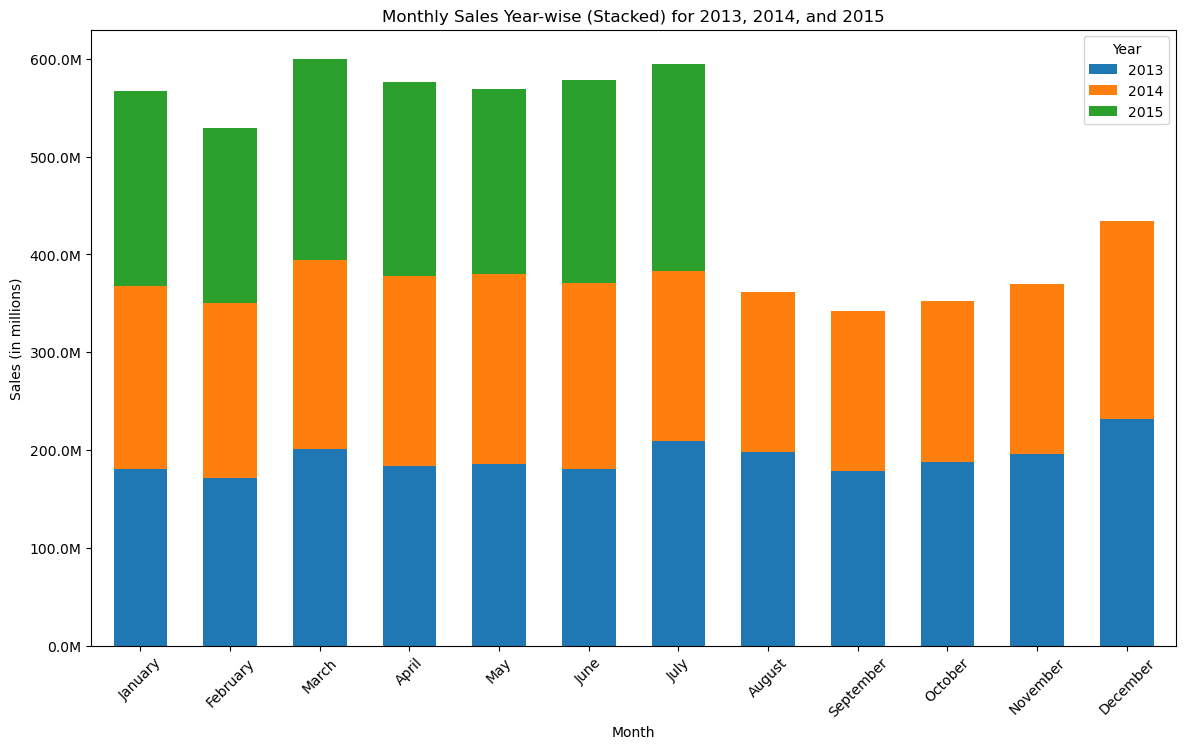

In [142]:
Store_open_data['Month'] = pd.Categorical(Store_open_data['Month'], categories=months_order, ordered=True)

# Filter data for the years 2013, 2014, and 2015
Store_open_data_filtered = Store_open_data[Store_open_data['Year'].isin([2013, 2014, 2015])]

# Group by Year and Month and sum the Sales
monthly_sales_yearwise = Store_open_data_filtered.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
bar_plot = monthly_sales_yearwise.plot(kind='bar', stacked=True, width=0.6, figsize=(14, 8))

# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45)

# Format the y-axis labels to show sales in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Monthly Sales Year-wise (Stacked) for 2013, 2014, and 2015')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')
plt.legend(title='Year')
plt.show()


### Impact of Promotions

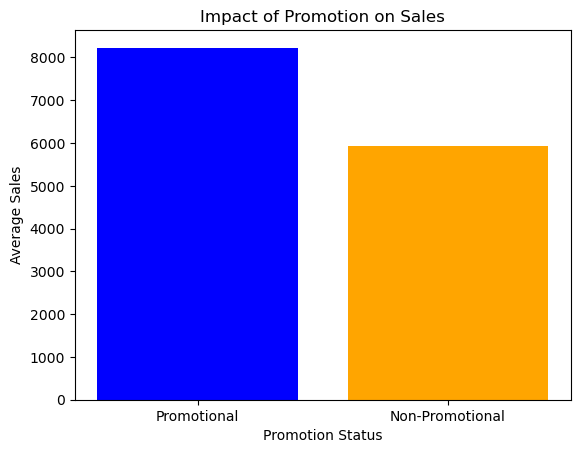

In [144]:
average_promo_sales = promotional_sales.mean()
average_non_promo_sales = non_promotional_sales.mean()

# Create a bar chart
labels = ['Promotional', 'Non-Promotional']
average_sales = [average_promo_sales, average_non_promo_sales]

plt.bar(labels, average_sales, color=['blue', 'orange'])
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.title('Impact of Promotion on Sales')
plt.show()

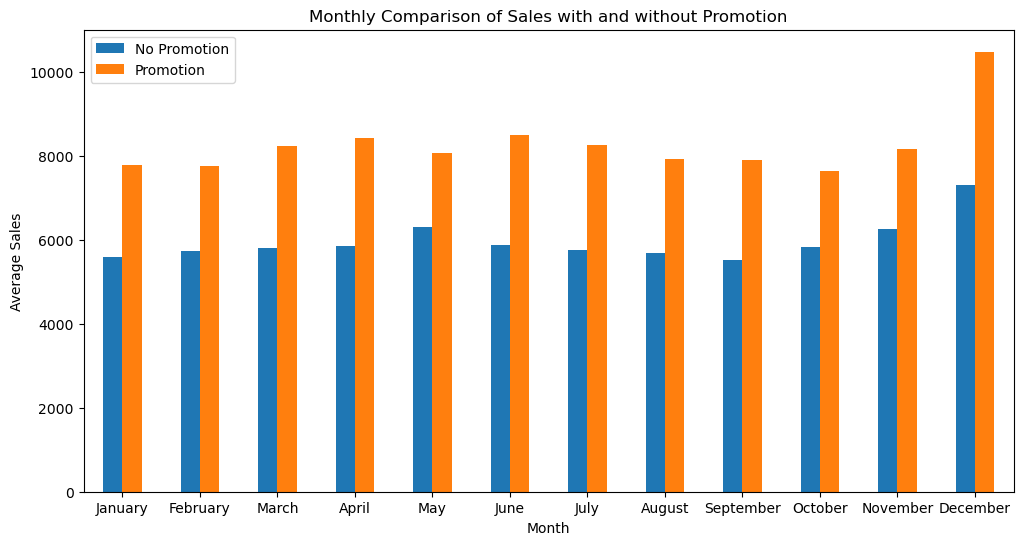

In [146]:
monthly_sales_comparison = Store_open_data.groupby(['Month', 'Promo'])['Sales'].mean().unstack()

# Plot the monthly comparison
monthly_sales_comparison.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Comparison of Sales with and without Promotion')
plt.xticks(rotation=0)
plt.legend(['No Promotion', 'Promotion'])
plt.show()

### Monthly Sales 

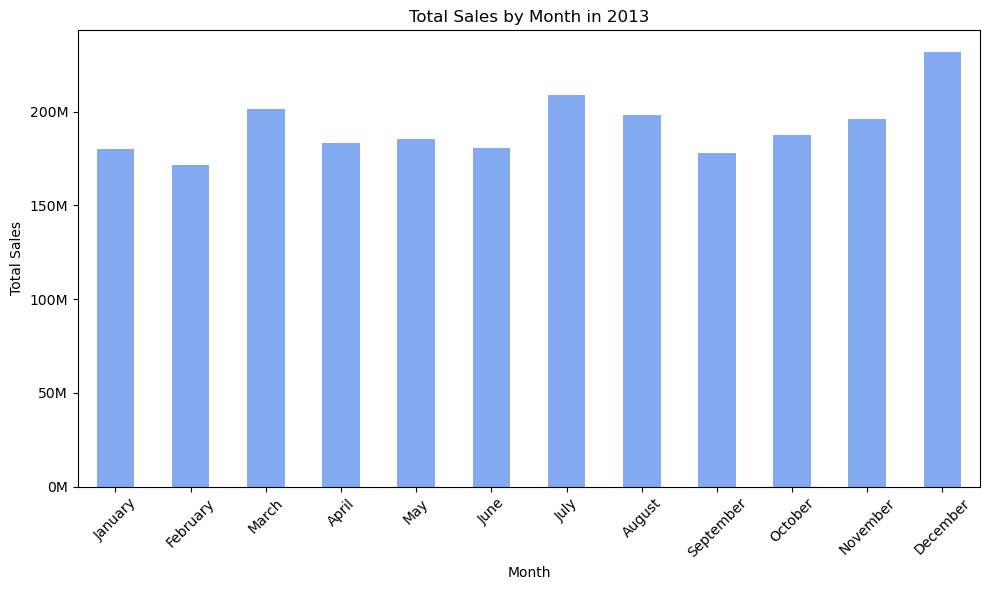

In [136]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Group by month and sum the sales
month_sales_2013 = Year_2013.groupby(['Month'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2013.plot(kind='bar', color="cornflowerblue", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2013')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


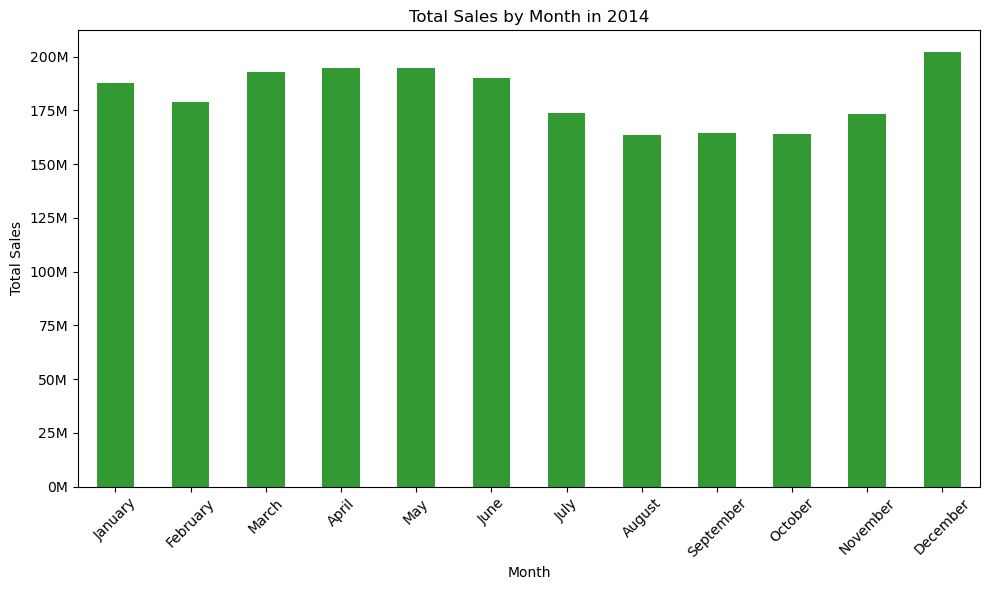

In [137]:
# Group by month and sum the sales
month_sales_2014 = Year_2014.groupby(['Month'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2014.plot(kind='bar', color="green", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2014')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

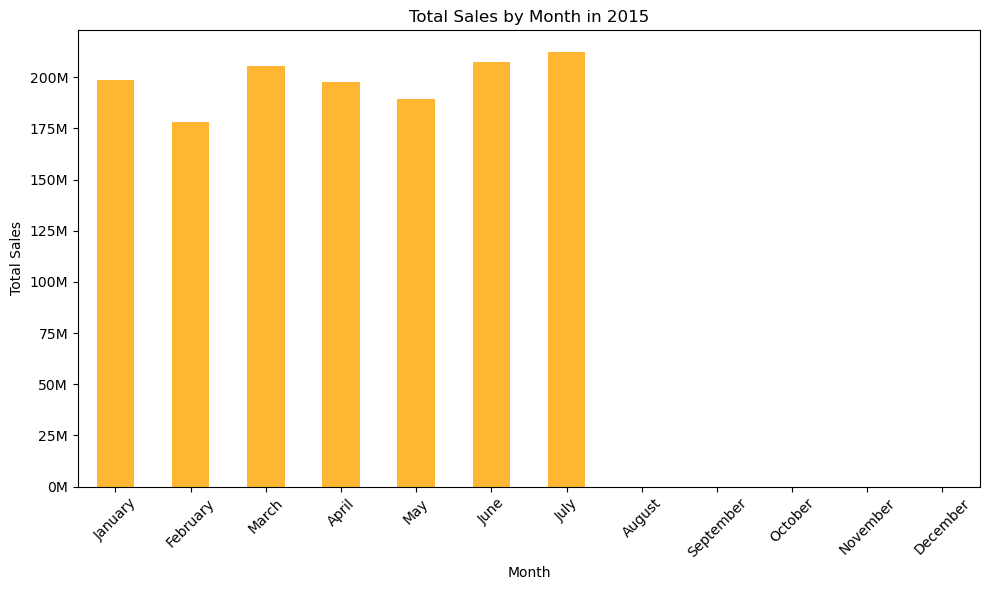

In [138]:
month_sales_2015 = Year_2015.groupby(['Month'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2015.plot(kind='bar', color="orange", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2015')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


### Impact of Competition Distance

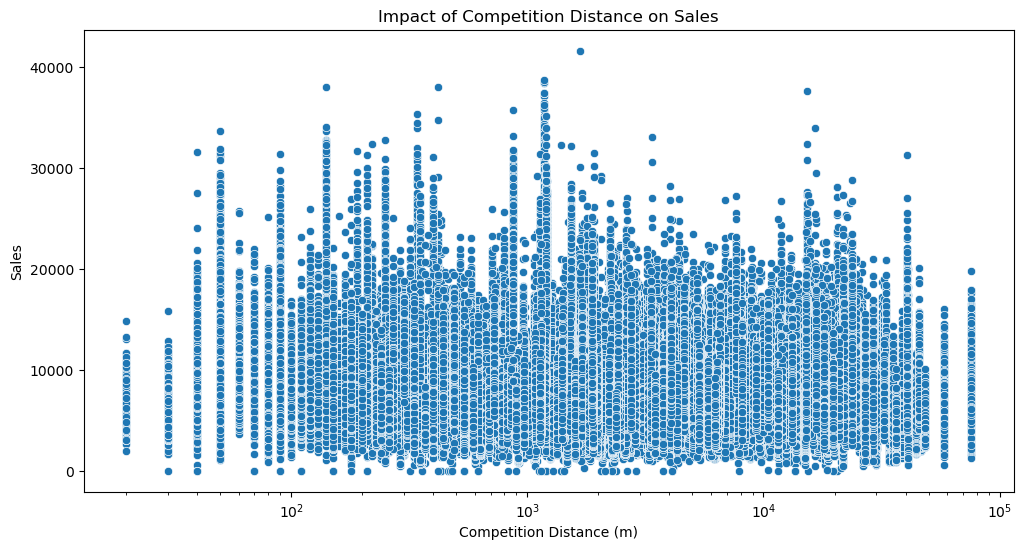

In [148]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
plt.title('Impact of Competition Distance on Sales')
plt.xlabel('Competition Distance (m)')
plt.ylabel('Sales')
plt.xscale('log')  # Log scale for better visualization given the large range of competition distances
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\4208039006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


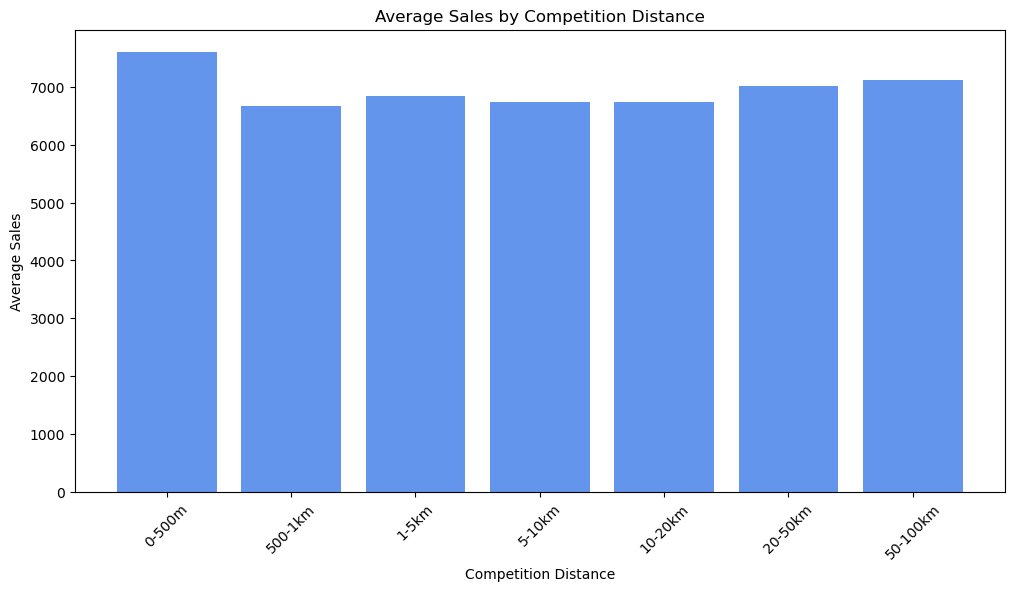

In [150]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate the average sales for each bin
average_sales = data.groupby('Distance Bin')['Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(average_sales['Distance Bin'], average_sales['Sales'], color='cornflowerblue')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\2860405988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


<Figure size 1200x600 with 0 Axes>

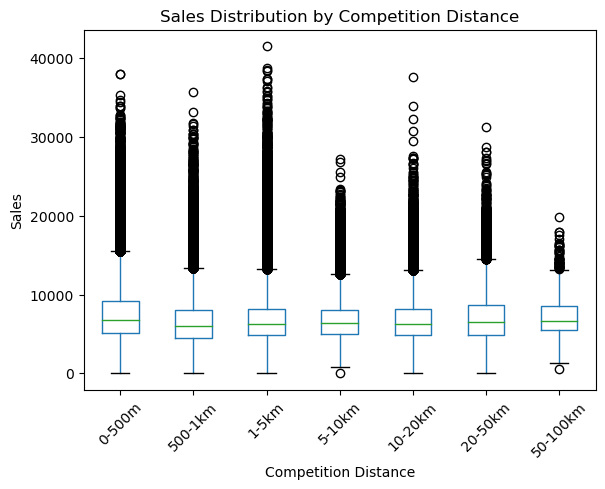

In [151]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(12, 6))
data.boxplot(column='Sales', by='Distance Bin', grid=False)
plt.title('Sales Distribution by Competition Distance')
plt.suptitle('')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\4134151223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


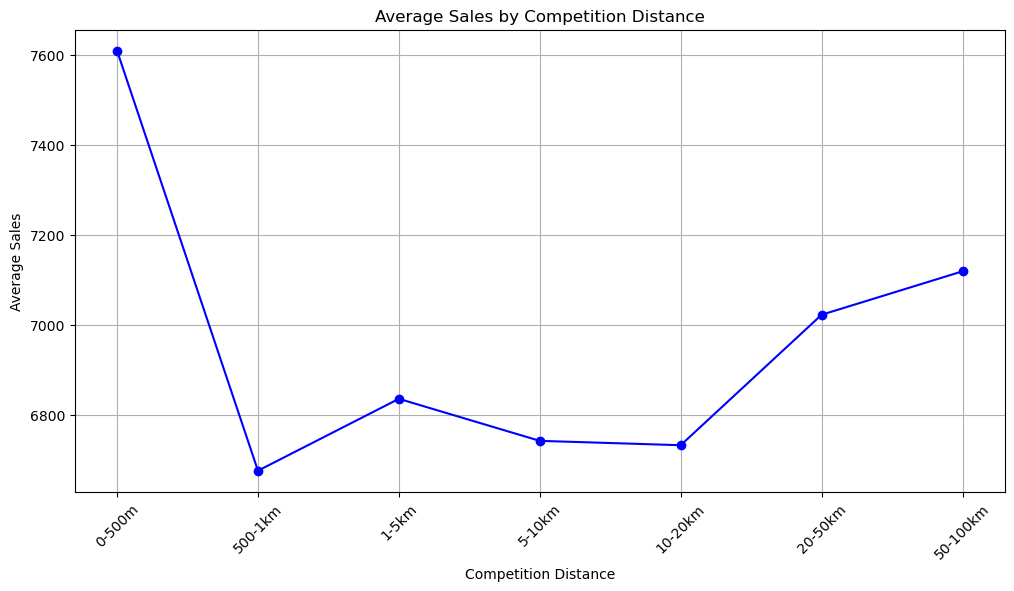

In [152]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate the average sales for each bin
average_sales = data.groupby('Distance Bin')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_sales['Distance Bin'], average_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### General Analysis

C:\Users\huzai\AppData\Local\Temp\ipykernel_13260\1999251042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


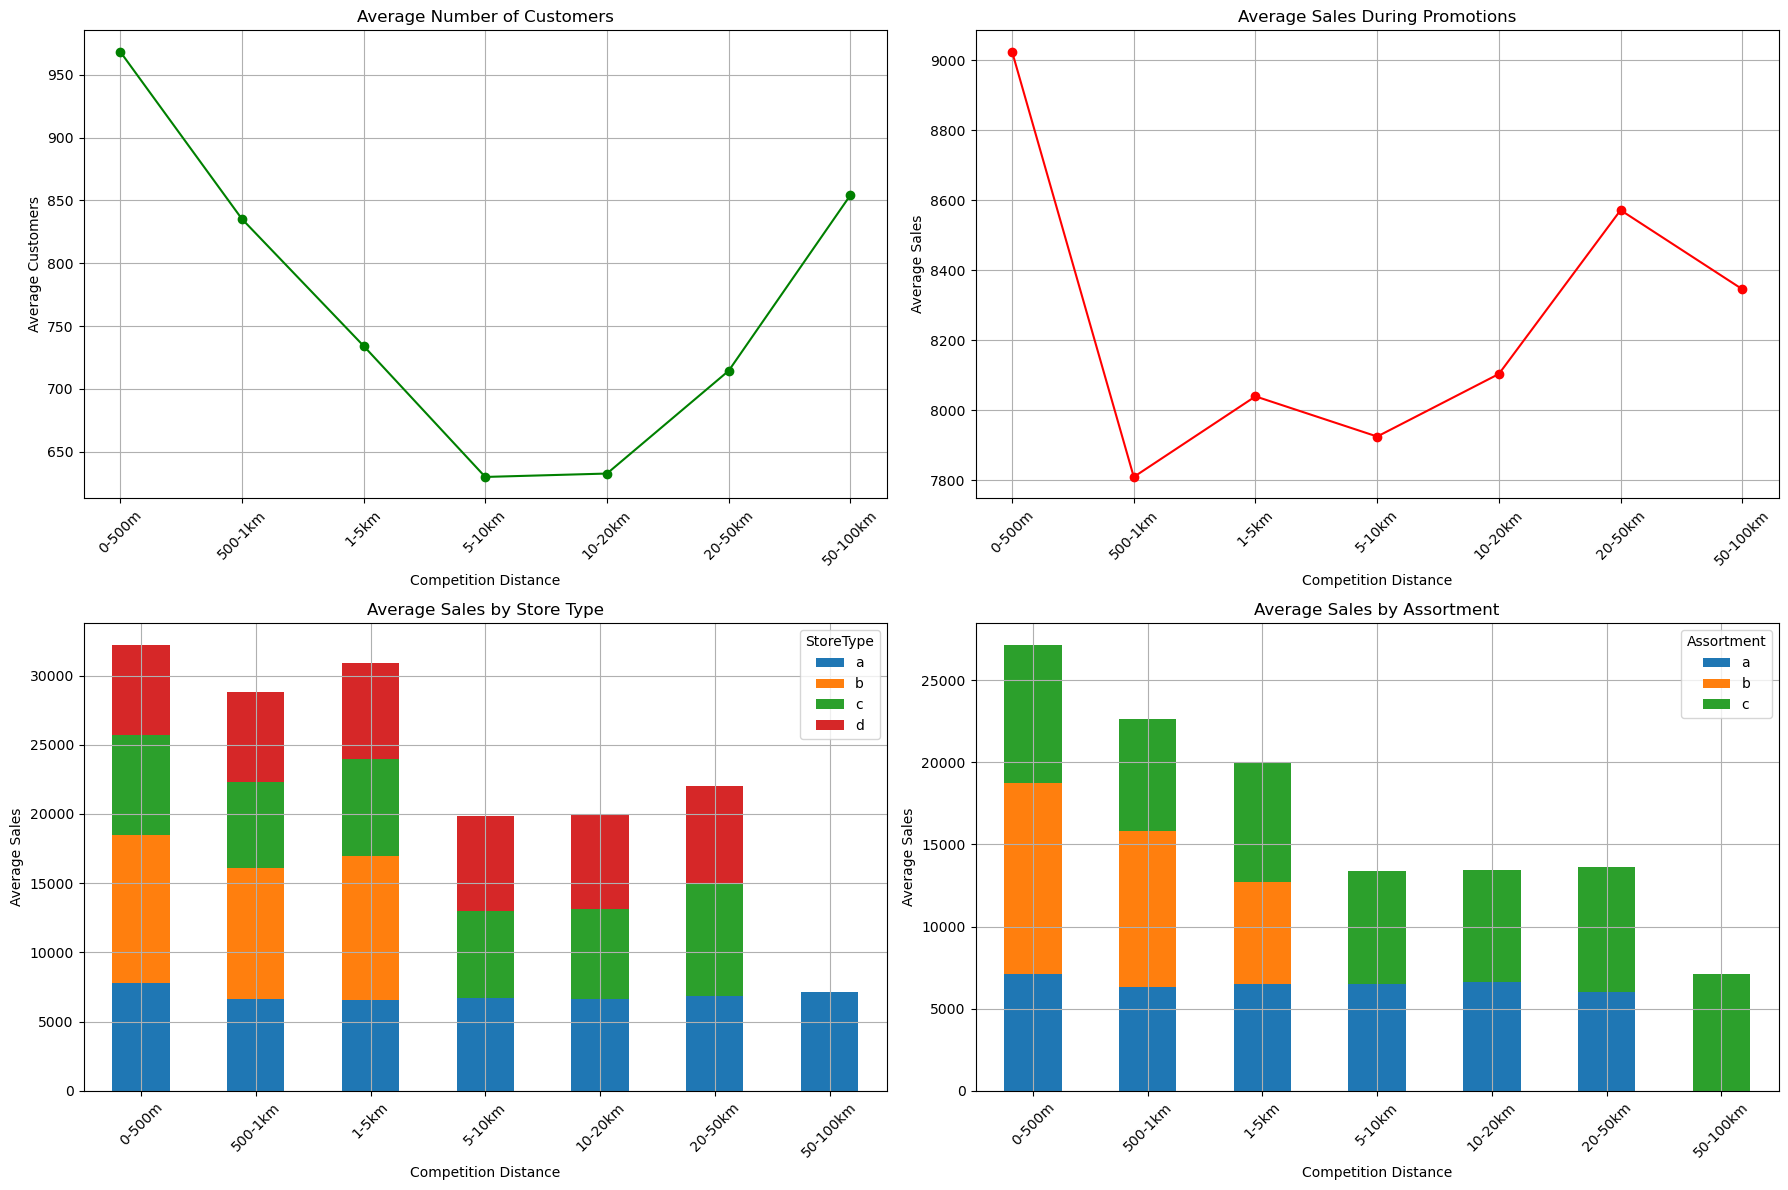

In [153]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales', 'Customers', 'StoreType', 'Promo', 'Assortment'])

# Define distance bins and labels
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average customers per distance bin
average_customers = data.groupby('Distance Bin')['Customers'].mean().reset_index()

# Calculate average sales during promotions per distance bin
average_sales_promo = data[data['Promo'] == 1].groupby('Distance Bin')['Sales'].mean().reset_index()

# Calculate average sales by store type and distance bin
average_sales_storetype = data.groupby(['Distance Bin', 'StoreType'])['Sales'].mean().unstack().reset_index()

# Calculate average sales by assortment and distance bin
average_sales_assortment = data.groupby(['Distance Bin', 'Assortment'])['Sales'].mean().unstack().reset_index()

# Plotting in subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Plot 1: Average Number of Customers by Competition Distance
axes[0, 0].plot(average_customers['Distance Bin'], average_customers['Customers'], marker='o', linestyle='-', color='g')
axes[0, 0].set_title('Average Number of Customers')
axes[0, 0].set_xlabel('Competition Distance')
axes[0, 0].set_ylabel('Average Customers')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# Plot 2: Average Sales During Promotions by Competition Distance
axes[0, 1].plot(average_sales_promo['Distance Bin'], average_sales_promo['Sales'], marker='o', linestyle='-', color='r')
axes[0, 1].set_title('Average Sales During Promotions')
axes[0, 1].set_xlabel('Competition Distance')
axes[0, 1].set_ylabel('Average Sales')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# Plot 3: Average Sales by Store Type and Competition Distance
average_sales_storetype.plot(ax=axes[1, 0], x='Distance Bin', kind='bar', stacked=True)
axes[1, 0].set_title('Average Sales by Store Type')
axes[1, 0].set_xlabel('Competition Distance')
axes[1, 0].set_ylabel('Average Sales')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True)

# Plot 4: Average Sales by Assortment and Competition Distance
average_sales_assortment.plot(ax=axes[1, 1], x='Distance Bin', kind='bar', stacked=True)
axes[1, 1].set_title('Average Sales by Assortment')
axes[1, 1].set_xlabel('Competition Distance')
axes[1, 1].set_ylabel('Average Sales')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales', 'Customers', 'StoreType', 'Promo', 'Assortment'])

bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average customers per distance bin
average_customers = data.groupby('Distance Bin')['Customers'].mean().reset_index()

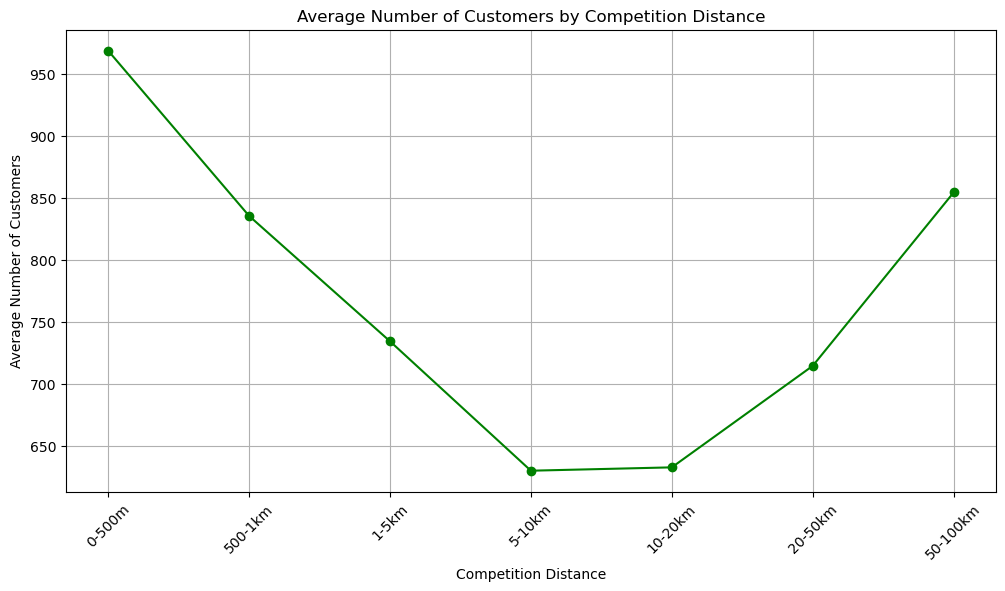

In [155]:
plt.figure(figsize=(12, 6))
plt.plot(average_customers['Distance Bin'], average_customers['Customers'], marker='o', linestyle='-', color='g')
plt.title('Average Number of Customers by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


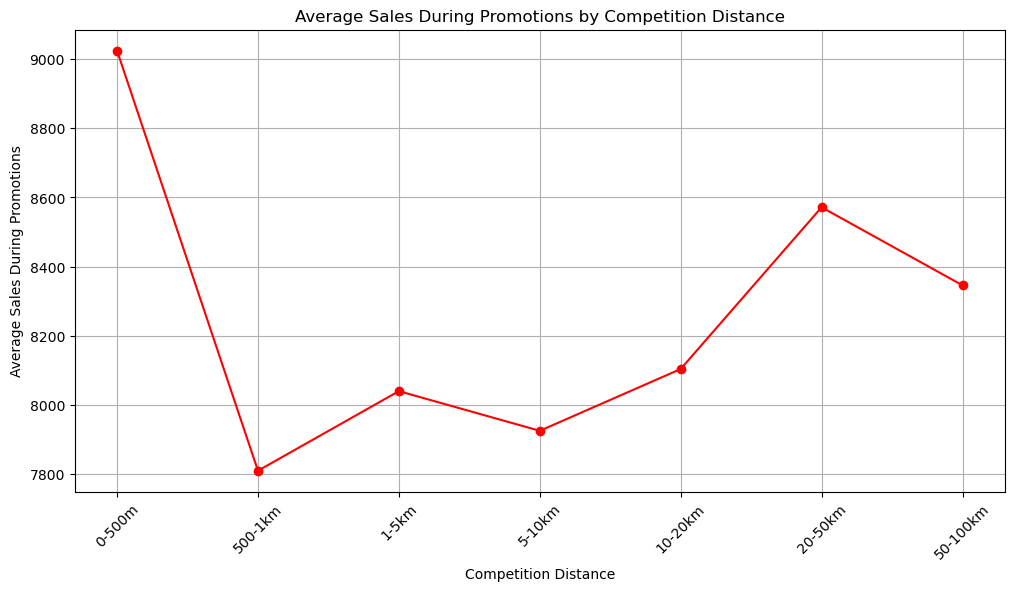

In [156]:
average_sales_promo = data[data['Promo'] == 1].groupby('Distance Bin')['Sales'].mean().reset_index()

# Plot and save average sales during promotions per distance bin
plt.figure(figsize=(12, 6))
plt.plot(average_sales_promo['Distance Bin'], average_sales_promo['Sales'], marker='o', linestyle='-', color='r')
plt.title('Average Sales During Promotions by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales During Promotions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


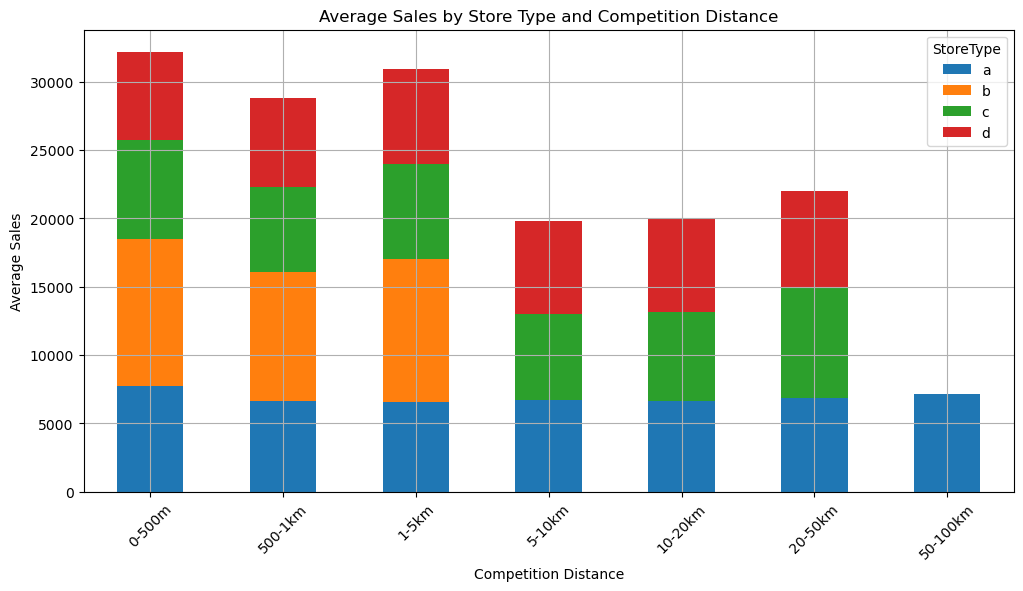

In [157]:
average_sales_storetype = data.groupby(['Distance Bin', 'StoreType'])['Sales'].mean().unstack().reset_index()

# Plot and save average sales by store type and distance bin
average_sales_storetype.plot(x='Distance Bin', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sales by Store Type and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


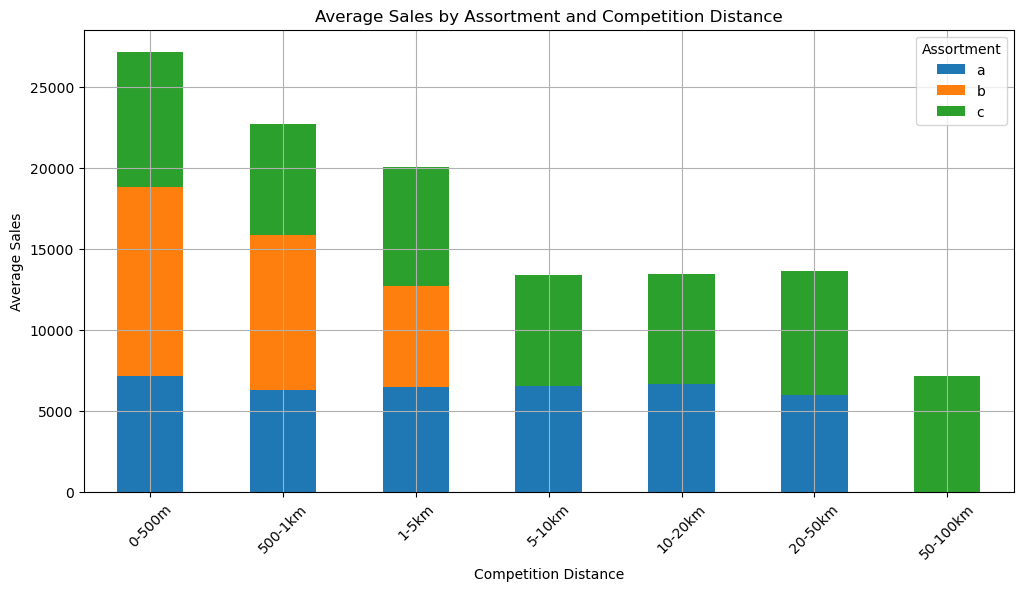

In [160]:
average_sales_assortment = data.groupby(['Distance Bin', 'Assortment'])['Sales'].mean().unstack().reset_index()
average_sales_assortment.plot(x='Distance Bin', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sales by Assortment and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## To Be Continued